# Beta Values for Data from Random Universe

In this exercise we are interested in fitting a linear regression model to predict units sold (sales) from TV advertising budget (tv). But when fitting a linear regression, slight variations in the training data can affect the coefficients of the model.

To make this issue more concrete, you've been provided with a function RandomUniverse(DataFrame) -> DataFrame that takes a dataset as input and returns a new, slightly different dataset from a "parallel universe." 

We can fit a regression model to this new, "parallel universe" data to calculate a \beta_0 and \beta_1 coefficient. This process can be repeated many times, first generating the new dataset with RandomUniverse, and then calculating a new \beta_0 and \beta_1 from the new dataset. 

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline


In [3]:
# Read the advertising dataset as a pandas dataframe
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the dataframe
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [4]:
# Create two empty lists that will store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate 
# that many new versions of the dataset
parallelUniverses = 100

# Loop over the maximum number of parallel Universes
for i in range(parallelUniverses):

    # Call the RandomUniverse helper function with the dataframe
    # read from the data file
    df_new = RandomUniverse(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new['tv'].mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new['sales'].mean()

    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = (sum((x_i-xmean)*(y_i-ymean) for x_i, y_i in zip(df_new['tv'], df_new['sales'])))/(sum((x_i-xmean)**2 for x_i in df_new['tv']))
    beta0 = ymean - beta1 * xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


In [5]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)


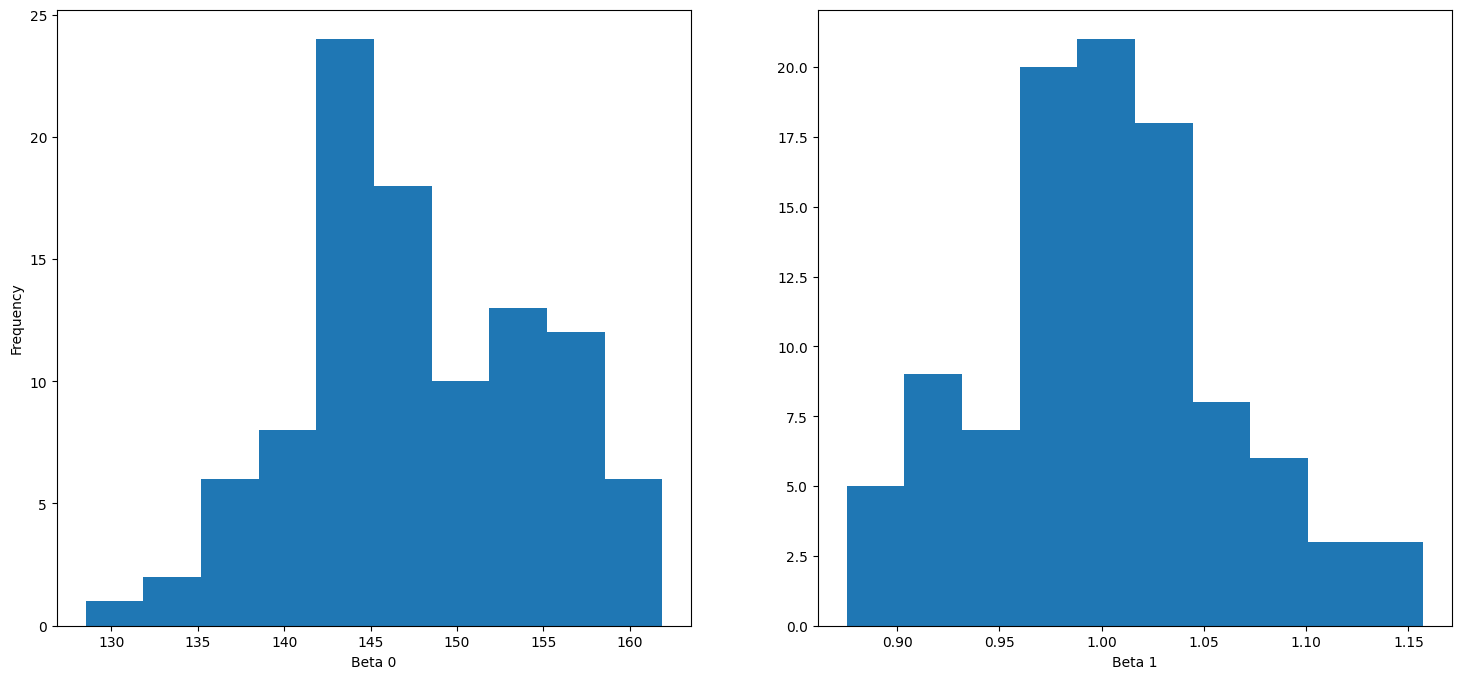

In [6]:
# Plot histograms of beta_0 and beta_1 using lists created above 
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');


⏸ Increase the number of parallelUniverses. Which of the following do you observe?

A. The range of the distribution increases.

B. The frequency of points decreases.

C. The range of the distribution decreases.

D. There is no significant change.

--D
